In [2]:
!pip install opencv-python

In [1]:
import cv2

In [4]:
import matplotlib.pyplot as plt

In [5]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [6]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [7]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name , 'rt') as fpt:
    classLabels = fpt.read().rstrip("\n").split('\n')
    

In [8]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
print(len(classLabels))

80


In [10]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) 
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001C276E0C230>

# Read an Image

In [11]:
img = cv2.imread('ab3.jpeg')

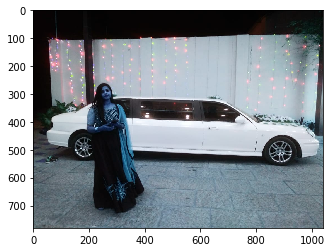

In [12]:
plt.imshow(img) ##bgr

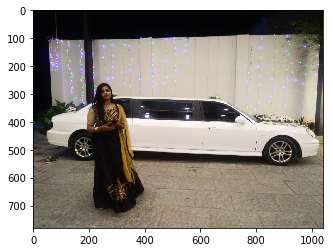

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) ##RGB

In [14]:
ClassIndex, confidece, bbox= model.detect(img,confThreshold=0.5)

In [15]:
print(ClassIndex)

[[ 3]
 [ 1]
 [64]]


In [16]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)


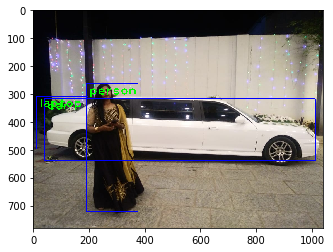

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Video Demo

In [18]:
cap = cv2.VideoCapture("")

if not cap.isOpened():
    cap= cv2.VideoCapture(0)
if not cap.isOpened():
    raise TOError("Cannot Open Video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidece, bbox= model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
         for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
                if (ClassInd<=80):
                    cv2.rectangle(frame,boxes,(255,0,0),2)
                    cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    
    cv2.imshow('Object Detection Tutorial',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
()
[[1]]
()
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[[70]]
[[70]
 [70]]
[[70]
 [70]]
[[70]]
[[70]
 [70]]
[[70]]
[[70]
 [70]]
[[70]
 [70]]
[[70]
 [70]]
[[70]
 [70]]
[[70]
 [70]]
[[70]
 [70]]
[[70]]
[[70]]
[[70]
 [70]]
[[70]
 [70]]
[[70]]
[[70]]
[[70]
 [70]]
[[70]]
[[70]
 [70]]
[[70]
 [70]]
[[70]]
[[70]]
[[70]]
[[70]]
[[70]]
[[70]]
[[70]]
[[70]]
[[70]]
[[70]]
[[70]]
[[70]
 [70]]
[[70]]
[[70]]
()
()
[[1]]
[[1]]
[[1]]
[[1]]
()
[[ 1]
 [77]]
[[77]
 [ 1]]
[[ 1]
 [77]]
[[77]
 [ 1]]
[[77]
 [ 1]]
[[77]
 [ 1]]
[[77

KeyboardInterrupt: 